In [468]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from collections import Counter
import math

In [469]:
def haversine_distance(lat1, lon1, lat2, lon2):
     
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2))
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return abs(rad * c)

def distance_func(p1, p2,graph=None,centroids=None):
    lat1=float(p1[2])
    long1=float(p1[4])
    
    lat2=float(p2[2])
    long2=float(p2[4])
    CC_time=0
    # for c in centroids:
    #     CC_distance=haversine_distance(float(c[2]),float(c[4]),lat2,long2)
    #     CC_time+=(CC_distance/(10*1000))
    bw=graph.get_edge_data(p1[0],p2[0])
    
    if bw==None:   
        bw=0.0000001
    else:
        if 'LinkLabel' in bw.keys():
            link_label=bw['LinkLabel']
            link_label = link_label.replace("<", "")
            if "Gbps" in link_label:
                link_label = float(link_label.replace("Gbps", "")) * 1000  
            elif "Mbps" in link_label:
                link_label = float(link_label.replace("Mbps", ""))
                
        else:
            link_label=155
                
    dist=haversine_distance(lat1,long1,lat2,long2)
    
    return (dist/link_label)

In [470]:
def output_unprocessed_point():
    subdata                = master_df[['Points','Cluster']]
    unprocessed_data       = subdata[subdata['Cluster']==0]
    index_unprocessed_data = unprocessed_data['Cluster'].index[0]
    return master_df.loc[index_unprocessed_data]['Points']
    

In [471]:
def check_processed(testpt):
    for i in range(len(master_df)):
        if Counter(np.array(testpt)==master_df.loc[i]['Points'])[True]==datasets.shape[1]:
            cluster_value = master_df.loc[i]['Cluster']
            if cluster_value==0:
                return 'not assigned'
            else:
                return 'assigned'

In [472]:
def calculate_neighbors(pt):
    df = pd.DataFrame(columns=['neighbors','nbr_distance','core_distance','reach_distance'])
    nbrs = []
    distance = []
    for i in range(datasets.shape[0]):
        if Counter(pt!=datasets[i])[True]==datasets.shape[1]:
            dist = distance_func(pt,datasets[i])
            if dist <eps:
                nbrs.append(datasets[i])
                distance.append(dist)
    df['neighbors'] = nbrs
    df['nbr_distance'] = distance
    df = df.sort_values('nbr_distance')
    df.index = range(len(df))
    if len(df)>=minpts:
        df['core_distance'] = [df.loc[minpts-1]['nbr_distance']]*len(df)
        df['reach_distance'] = df[['nbr_distance','core_distance']].max(axis=1)
        core_dist_decision  = 'defined'
    else:    
        df['core_distance'] = [1000000]*len(df)
        df['reach_distance'] = [100000]*len(df)
        core_dist_decision  = 'undefined'
    return df, df['neighbors'].values,core_dist_decision

In [473]:
def update_p(p,Cluster,N):
    for i in range(master_df.shape[0]):
            if Counter(np.array(p)==master_df.loc[i]['Points'])[True]==datasets.shape[1]:
                master_df.loc[i,'Cluster']       = Cluster
                master_df.loc[i,'Core Distance'] = N['core_distance'].values[0]
                

In [474]:
def update_neighbor_data(N):
    for i in range(len(N)):
        pt             = N['neighbors'][i]
        reach_distance = N['reach_distance'][i]
        for j in range(master_df.shape[0]):
                
                if Counter(pt==master_df.loc[j]['Points'])[True]==datasets.shape[1]:
                    existing_reach_dist     = master_df.loc[j]['Reachability Distance']
                    
                    if existing_reach_dist == 100000 or (existing_reach_dist >reach_distance):
                        master_df.loc[j,'Reachability Distance']=reach_distance


    

In [475]:
import networkx as nx 
# file_data=read_file('gml')
file_data
graph=nx.parse_gml(file_data)
    # print("Nodes",graph.nodes(data=True))
    # print("Edges",graph.edges(data=True))
    # print(graph.graph)
node_list = []
for node_id, node_data in graph.nodes(data=True):
    temp= [
    node_id,
    node_data.get('Country', ''),
    node_data.get('Latitude', ''),
    node_data.get('Internal', ''),
    node_data.get('Longitude', '')
    ]
    node_list.append(temp)

print(node_list)

[['Sydney1', 'Australia', -33.86785, 1, 151.20732], ['Brisbane2', 'Australia', -27.46794, 1, 153.02809], ['Canberra1', 'Australia', -35.28346, 1, 149.12807], ['Sydney2', 'Australia', -33.86785, 1, 151.20732], ['Townsville', 'Australia', -19.25, 1, 146.8], ['Cairns', 'Australia', -16.91667, 1, 145.76667], ['Brisbane1', 'Australia', -27.46794, 1, 153.02809], ['Rockhampton', 'Australia', -23.38333, 1, 150.5], ['Armidale', 'Australia', -30.51667, 1, 151.65], ['Hobart', 'Australia', -42.87936, 1, 147.32941], ['Canberra2', 'Australia', -35.28346, 1, 149.12807], ['Perth1', 'Australia', -31.93333, 1, 115.83333], ['Perth2', 'Australia', -31.93333, 1, 115.83333], ['Adelaide1', 'Australia', -34.93333, 1, 138.6], ['Adelaide2', 'Australia', -34.93333, 1, 138.6], ['Melbourne1', 'Australia', -37.814, 1, 144.96332], ['Melbourne2', 'Australia', -37.814, 1, 144.96332], ['Alice Springs', 'Australia', -23.7, 1, 133.88333], ['Darwin', 'Australia', -12.46113, 1, 130.84185]]


In [476]:
X=np.array(node_list)
datasets = X


In [477]:
minpts                             = 1
eps                                = 0.0001
master_df                          = pd.DataFrame(columns=['Points','Cluster','Reachability Distance','Core Distance'])
master_df['Points']                = [list(X[i]) for i in range(X.shape[0])]
master_df['Cluster']               = [0] *(X.shape[0])
master_df['Reachability Distance'] = [100000]*X.shape[0]
master_df['Core Distance']         = [100000]*X.shape[0]
unclustered_data                   = len(master_df[master_df['Cluster']==0])
Cluster                            = 1
master_df.head()

,Points,Cluster,Reachability Distance,Core Distance
0,"[Sydney1, Australia, -33.86785, 1, 151.20732]",0,100000,100000
1,"[Brisbane2, Australia, -27.46794, 1, 153.02809]",0,100000,100000
2,"[Canberra1, Australia, -35.28346, 1, 149.12807]",0,100000,100000
3,"[Sydney2, Australia, -33.86785, 1, 151.20732]",0,100000,100000
4,"[Townsville, Australia, -19.25, 1, 146.8]",0,100000,100000


In [478]:
max_iters=0
while unclustered_data>0 and max_iters<1000:
    
    p                             = output_unprocessed_point()
    N,nbrs_p,coredist_decision    = calculate_neighbors(p)
    print(N)
    if coredist_decision=='defined':
        _              = update_p(p,Cluster,N)
        _              = update_neighbor_data(N)
    for i in range(len(nbrs_p)):
        if check_processed(nbrs_p[i]) == 'not assigned':
            N_new,nbrs_q,coredist_decision = calculate_neighbors(nbrs_p[i])
            if coredist_decision=='defined':
                _              = update_p(nbrs_p[i],Cluster,N_new)
                _              = update_neighbor_data(N_new)
    Cluster = Cluster+1
    unclustered_data = len(master_df[master_df['Cluster']==0])
    max_iters+=1
    if max_iters%100==0:
        print(max_iters)
    
    

Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance

Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance]
Index: []
Empty DataFrame
Columns: [neighbors, nbr_distance, core_distance, reach_distance

In [479]:
master_df

,Points,Cluster,Reachability Distance,Core Distance
0,"[Sydney1, Australia, -33.86785, 1, 151.20732]",0,100000,100000
1,"[Brisbane2, Australia, -27.46794, 1, 153.02809]",0,100000,100000
2,"[Canberra1, Australia, -35.28346, 1, 149.12807]",0,100000,100000
3,"[Sydney2, Australia, -33.86785, 1, 151.20732]",0,100000,100000
4,"[Townsville, Australia, -19.25, 1, 146.8]",0,100000,100000
5,"[Cairns, Australia, -16.91667, 1, 145.76667]",0,100000,100000
6,"[Brisbane1, Australia, -27.46794, 1, 153.02809]",0,100000,100000
7,"[Rockhampton, Australia, -23.38333, 1, 150.5]",0,100000,100000
8,"[Armidale, Australia, -30.51667, 1, 151.65]",0,100000,100000
9,"[Hobart, Australia, -42.87936, 1, 147.32941]",0,100000,100000


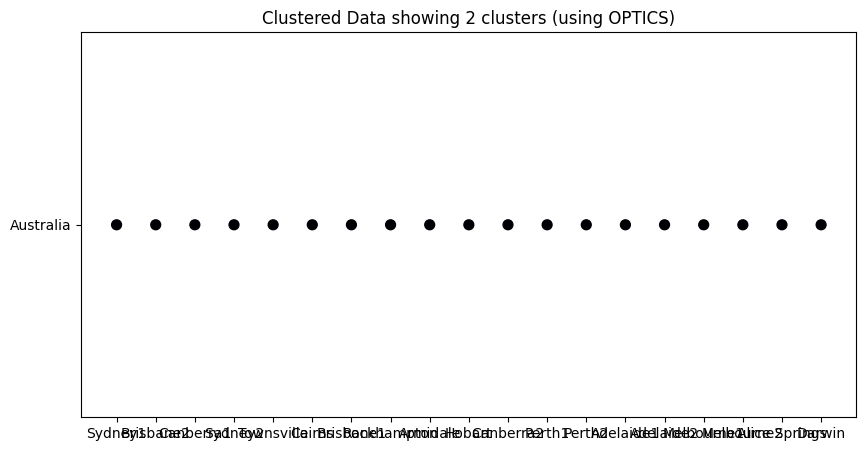

In [480]:
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Clustered Data showing 2 clusters (using OPTICS)")
ax.scatter(X[:,0],X[:,1],c=master_df['Cluster'].values,s=50,cmap = 'inferno');

We will now see graphically how dense the points are clustered with each other (Density of points using reachability) 

In [481]:
first_cluster = master_df[master_df['Cluster']==1].sort_values('Reachability Distance')

In [482]:
second_cluster = master_df[master_df['Cluster']==2].sort_values('Reachability Distance')

IndexError: index 0 is out of bounds for axis 0 with size 0

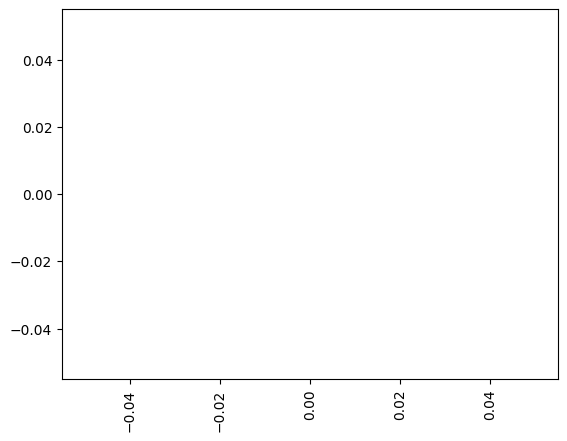

In [483]:
ax        = first_cluster['Reachability Distance'].plot(kind="bar", legend=False,color='green')
ax.set_ylabel("Reachability Distance");
ax.set_xlabel('Sample Points');

IndexError: index 0 is out of bounds for axis 0 with size 0

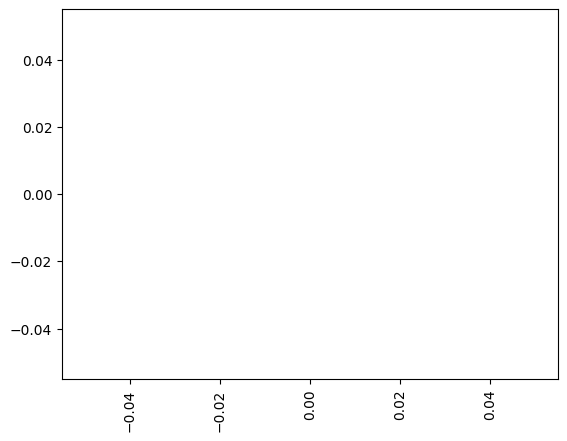

In [ ]:
ax        = second_cluster['Reachability Distance'].plot(kind="bar", legend=False,color='pink')
ax.set_ylabel("Reachability Distance");
ax.set_xlabel('Sample Points');

### We will now use optics method from sklearn's implementation which will be much faster

In [ ]:
from sklearn.cluster import OPTICS
y_cluster = OPTICS(min_samples=10).fit_predict(X)
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Clustered Data showing 2 clusters (using Sklearn's OPTICS)")
ax.scatter(X[:,0],X[:,1],c=y_cluster,s=50,cmap = 'inferno');

ValueError: could not convert string to float: 'Sydney1'

In [ ]:
import pandas as pd

# Sample DataFrame
data = {'nbr_distance': [3, 5, 7],
        'core_distance': [4, 2, 6]}
df = pd.DataFrame(data)

# Calculate the maximum value for each row
max_values = df[['nbr_distance', 'core_distance']].max(axis=1)

# Add a new column 'reach_distance' with the maximum values
df['reach_distance'] = max_values

print(df)


   nbr_distance  core_distance  reach_distance
0             3              4               4
1             5              2               5
2             7              6               7
